In [1]:
# switch to the project directory
%cd ../..
# working directory should be ../pdi

/home/mytkom/Documents/alice/pdi


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

module_path = os.path.abspath('src')

if module_path not in sys.path:
    sys.path.append(module_path)

from pdi.data.data_preparation import load_root_data
from pdi.data.constants import TARGET_COLUMN
from pdi.data.data_exploration import plot_feature_distributions_by_condition, plot_group_ratio, generate_figure_thumbnails_from_iterator, plot_cor_matrix, plot_feature_combinations, plot_feature_histogram2d_combinations
from pdi.constants import TARGET_CODES

In [3]:
INPUT_PATH = "data/raw/MC_ALL_AO2D_LHC23k4g-535069-from-001-to-006.root"

data, is_experimental, is_extended = load_root_data(input_files=[INPUT_PATH])

if is_experimental:
    raise AttributeError("This notebook is suitable only for simulated (MC) data!")

In [4]:
features = ['fTPCSignal', 'fTRDPattern', 'fTOFSignal', 'fBeta', 'fP', 'fPx', 'fPy', 'fPz', 'fX', 'fY', 'fZ', 'fAlpha', 'fTPCNClsShared', 'fDcaXY', 'fDcaZ']

# Missing detectors combinations

In [ ]:
missing_conditions = [
    data["fTOFSignal"].isna() & data["fTRDPattern"].notna(),
    data["fTRDPattern"].isna() & data["fTOFSignal"].notna(),
    data["fTOFSignal"].isna() & data["fTRDPattern"].isna(),
    data["fTRDPattern"].notna() & data["fTOFSignal"].notna(),
]
missing_labels = ["Missing TOF", "Missing TRD", "Missing TOF+TRD", "Nothing missing"]

# We do not want to plot signal distributions for the features that are not in the data
filtered_features = [feature for feature in features if feature not in ['fTRDPattern', 'fTOFSignal', 'fBeta']]

save_directory = None
save_directory = f"eda_results/diff_missing_det"
if save_directory:
   os.makedirs(save_directory, exist_ok=True)

### Ratio

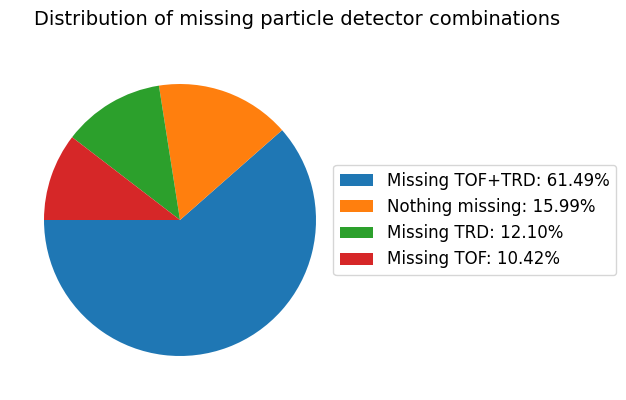

In [6]:
pie_miss_dect = plot_group_ratio(missing_labels, missing_conditions, title="Distribution of missing particle detector combinations")
if save_directory:
    pie_miss_dect.savefig(f"{save_directory}/missing_det_ratio.png", dpi=300, bbox_inches='tight')

### Histogram per feature


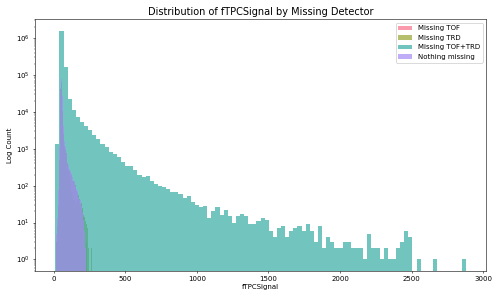
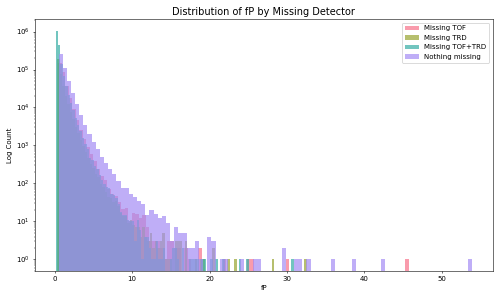
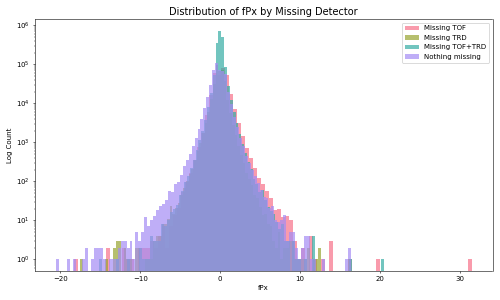
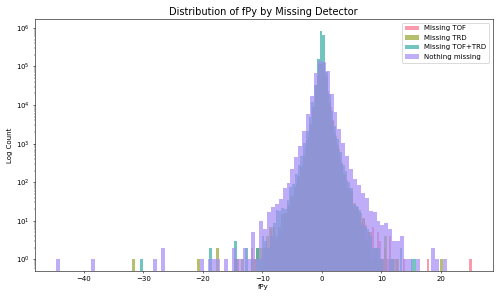
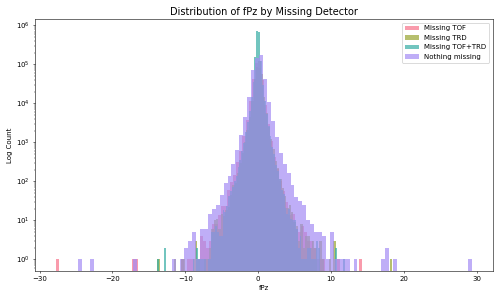
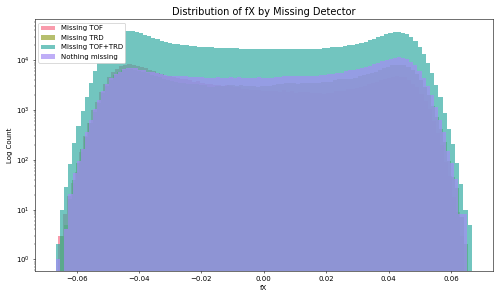
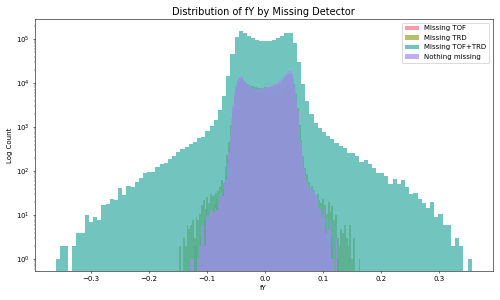
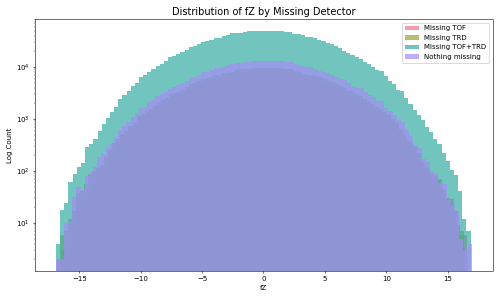
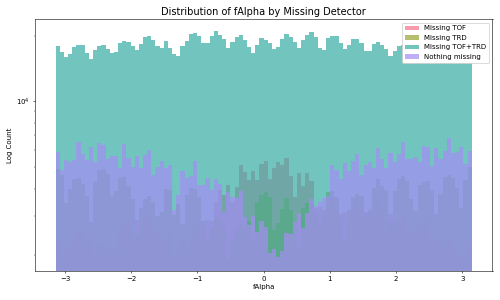
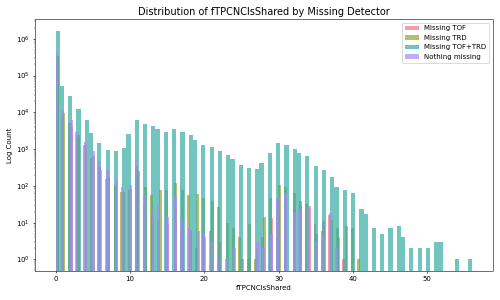
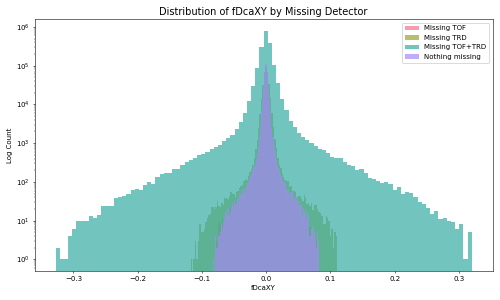
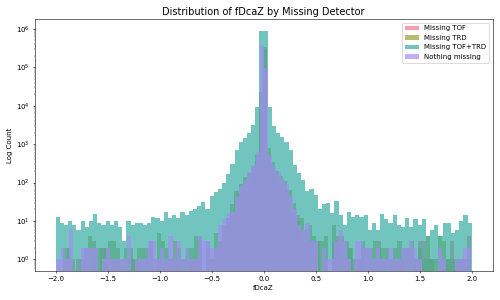

In [7]:
# Histograms
hist_gen = plot_feature_distributions_by_condition(
    data, filtered_features, missing_labels, missing_conditions,
    plot_type="hist", log_y=True, title_template="Distribution of {feature} by Missing Detector"
)
generate_figure_thumbnails_from_iterator(hist_gen, save_directory)

### Boxplots per feature


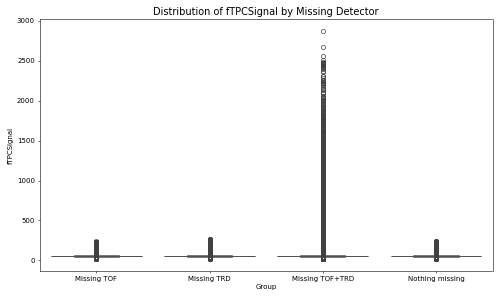
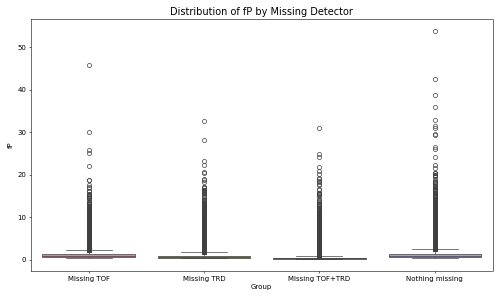
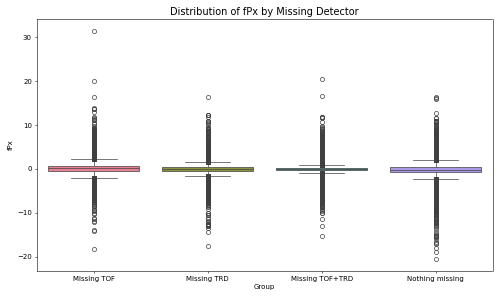
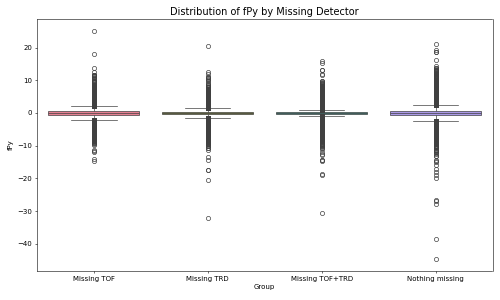
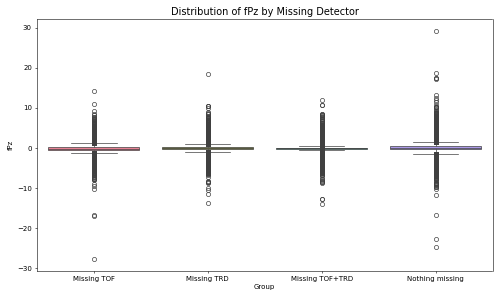
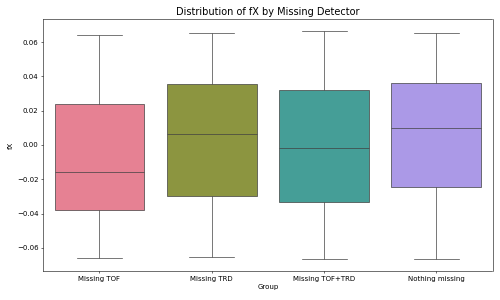
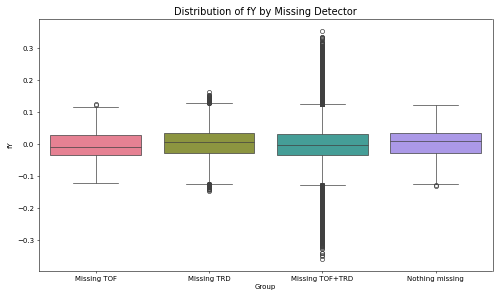
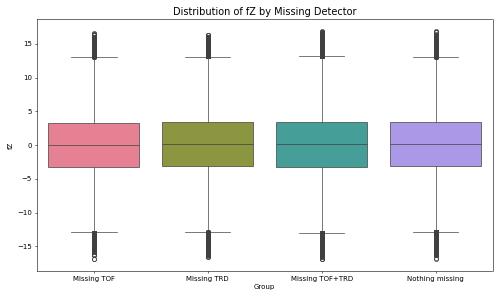
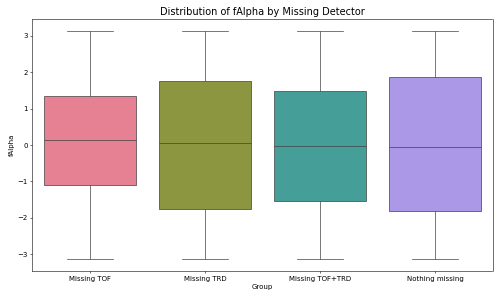
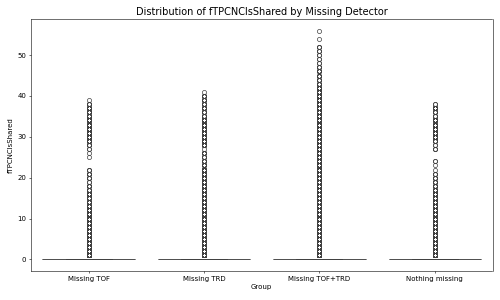
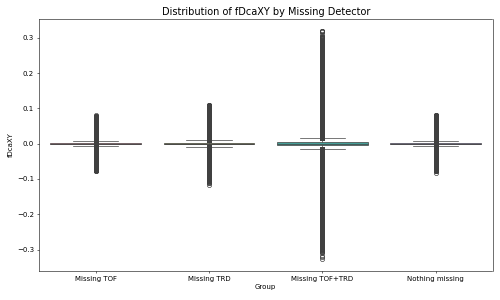
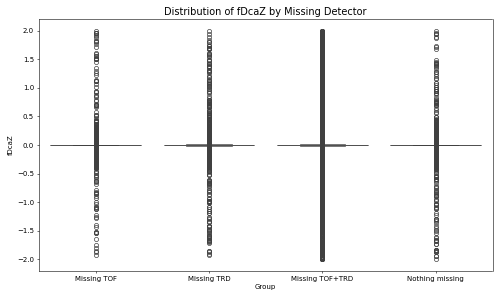

In [8]:
# Boxplots
boxplot_gen = plot_feature_distributions_by_condition(
    data, filtered_features, missing_labels, missing_conditions,
    plot_type="boxplot", title_template="Distribution of {feature} by Missing Detector"
)
generate_figure_thumbnails_from_iterator(boxplot_gen, save_directory)

## Particle types of PIDML interest

In [9]:
particle_conditions = [data[TARGET_COLUMN] == code for code in TARGET_CODES]
particle_conditions.append(~data[TARGET_COLUMN].isin(TARGET_CODES))  # "other particles" condition

particle_labels = [PARTICLES_DICT[code] for code in TARGET_CODES]
particle_labels.append("other particles")  # Add label for "other particles"

save_directory = f"{main_dir}/dist_by_particle"
os.makedirs(save_directory, exist_ok=True)

NameError: name 'PARTICLES_DICT' is not defined

### Ratio

In [ ]:
# Ratio
pie_part_dist = plot_group_ratio(particle_labels, particle_conditions, title="Distribution of particle types")
pie_part_dist.savefig(f"{save_directory}/part_dist_ratio.png", dpi=300, bbox_inches='tight')

### Correlation matrices

In [ ]:
save_directory_cor_mat = f"{main_dir}/cor_mat"
os.makedirs(save_directory_cor_mat, exist_ok=True)

filtered_data = data[features + [TARGET_COLUMN]]

particle_types_cor_mat = [filtered_data[condition] for condition in particle_conditions[:-1]]  # Exclude "other particles"
particle_labels_cor_mat = [PARTICLES_DICT[code] for code in TARGET_CODES]
particle_types_cor_mat.append(filtered_data)  # Add "all particles"
particle_labels_cor_mat.append("all particles")

# Generate correlation matrix plots
plots = ((plot_cor_matrix(particle_data, label), label) for particle_data, label in zip(particle_types_cor_mat, particle_labels_cor_mat))
generate_figure_thumbnails_from_iterator(plots, save_directory_cor_mat)

### Histograms per feature

In [ ]:
# Histograms
hist_gen = plot_feature_distributions_by_condition(
    data, features, particle_labels[:-1], particle_conditions[:-1],
    plot_type="kde", title_template="Distribution of {feature} by Particle"
)
generate_figure_thumbnails_from_iterator(hist_gen, save_directory)

## Compare of the basis of "fSign"

In [ ]:
sign_conditions = [
    data["fSign"] == 1,
    data["fSign"] == -1
]
sign_labels = ["fSign = 1", "fSign = -1"]
save_directory = f"{main_dir}/dist_by_sign"
os.makedirs(save_directory, exist_ok=True)

# Histograms
hist_gen = plot_feature_distributions_by_condition(
    data, features, sign_labels, sign_conditions,
    plot_type="kde", title_template="Distribution of {feature} by Particle Sign"
)
generate_figure_thumbnails_from_iterator(hist_gen, save_directory)

## Feature combinations

In [ ]:
features_to_plot = ["fTPCSignal", "fTRDPattern", "fBeta", "fP"]
save_directory = f"{main_dir}/feature_combinations"
os.makedirs(save_directory, exist_ok=True)

In [ ]:
# Scatterplots
generate_figure_thumbnails_from_iterator(plot_feature_combinations(data, features_to_plot), save_directory)

In [ ]:
# Histograms
generate_figure_thumbnails_from_iterator(plot_feature_histogram2d_combinations(data, features_to_plot), save_directory)